## Preprocesamiento de la base
Dada la estructura del archivo necesito trasnformarlo para proceder con el analisis

In [3]:
import pandas as pd

# 1. Leer el dataset original
df = pd.read_excel('BBDD_Dialogos.xlsx')

# 2. Transformar el dataset
cols_to_replicate = ["ID", "ID Archivo", "Fecha", "Hora Inicio", "Hora Termino", 
                     "Lugar", "Dirección", "Comuna", "Region", "Participantes", "Grupo"]

transformations = {
    "P2_A": ["P2_1_A", "P2_2_A", "P2_3_A", "P2_4_A", "P2_5_A"],
    "P2_B": ["P2_1_B", "P2_2_B", "P2_3_B", "P2_4_B", "P2_5_B"],
    "P3_A": ["P3_1_A", "P3_2_A", "P3_3_A", "P3_4_A", "P3_5_A"],
    "P3_B": ["P3_1_B", "P3_2_B", "P3_3_B", "P3_4_B", "P3_5_B"],
    "RUN": [f"LP_RUN{i}" for i in range(1, 6)],
    "COMUNA": [f"LP_COMUNA{i}" for i in range(1, 6)],
    "EDAD": [f"LP_EDAD{i}" for i in range(1, 6)],
    "SEXO": [f"LP_COD_SEXO_P{i}" for i in range(1, 6)],
    "EDUCACION": [f"LP_COD_NIVEL_P{i}" for i in range(1, 6)]
}

def transform_dataframe(df):
    transformed_data = []
    for idx, row in df.iterrows():
        for i in range(5):
            new_row = {}
            for col in cols_to_replicate:
                new_row[col] = row[col]
            for key, values in transformations.items():
                new_row[key] = row[values[i]]
            transformed_data.append(new_row)
    return pd.DataFrame(transformed_data)

transformed_df = transform_dataframe(df)

# 3. Guardar el dataset transformado en un nuevo archivo Excel
transformed_df.to_excel('dataset_transformado2.xlsx', index=False)

## Lematizacion y Vectorizacion con Spacy

In [ ]:
# %%time
# import spacy
# import numpy as np
# import pandas as pd
# from tqdm.notebook import tqdm

# # Cargar el modelo de lenguaje de spaCy para español con vectores
# nlp = spacy.load('es_core_news_md')

# def lemmatize_and_vectorize(text):
#     """Función para lematizar el texto y devolver el texto lematizado y su vector promedio."""
#     if not isinstance(text, str) or not text:
#         return '', np.zeros(nlp.meta["vectors"]["width"])
#     doc = nlp(text)
#     lemmatized_text = ' '.join([token.lemma_ for token in doc if token.pos_ in ['NOUN'] and not token.is_stop and not token.is_punct and not token.is_space])
#     #
#     vector = doc.vector
#     return lemmatized_text, vector.tolist()

# # Leer el dataset transformado
# csv_data = pd.read_excel('dataset_transformado2.xlsx')

# csv_data = csv_data.dropna(subset=['P2_A', 'P3_A'])

# # Nombres de las columnas a procesar
# columns_to_process = ['P2_A', 'P3_A']

# # Procesar cada columna
# for col in tqdm(columns_to_process, desc="Procesando columnas"):
#     lemmatized_col_name = f'{col}_lemmatized'
#     vector_col_name = f'{col}_vector'

#     # Aplicar la función de lematización y vectorización
#     results = csv_data[col].astype(str).apply(lemmatize_and_vectorize)
#     csv_data[lemmatized_col_name] = results.apply(lambda x: x[0])
#     csv_data[vector_col_name] = results.apply(lambda x: x[1])

# # Guardar el dataset transformado
# csv_data.to_excel('dataset_transformado2.xlsx', index=False)

# print("Proceso completado y guardado en 'dataset_transformado2.xlsx'")


In [4]:
%%time
import spacy
import pandas as pd
from tqdm.notebook import tqdm

# Cargar el modelo de lenguaje de spaCy para español
nlp = spacy.load('es_core_news_md')

def lemmatize(text):
    """Función para lematizar el texto."""
    if not isinstance(text, str) or not text:
        return ''
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc if token.pos_ in ['NOUN', 'AUX']])
#and not token.is_stop and not token.is_punct and not token.is_space
# Leer el dataset transformado
csv_data = pd.read_excel('dataset_transformado2.xlsx')
csv_data = csv_data.dropna(subset=['P2_A', 'P3_A'])

# Nombres de las columnas a procesar
columns_to_process = ['P2_A', 'P3_A']

# Lematizar cada columna
for col in tqdm(columns_to_process, desc="Lematizando columnas"):
    lemmatized_col_name = f'{col}_lemmatized'
    csv_data[lemmatized_col_name] = csv_data[col].astype(str).apply(lemmatize)

# Guardar el dataset con lematización
csv_data.to_excel('dataset_transformado2.xlsx', index=False)

Lematizando columnas:   0%|          | 0/2 [00:00<?, ?it/s]

CPU times: total: 1min 32s
Wall time: 5min 47s


In [ ]:
# %%time
# import spacy
# import pandas as pd
# from tqdm.notebook import tqdm

# # Cargar el modelo de lenguaje de spaCy para español
# nlp = spacy.load('es_core_news_md')

# def lemmatizer_nouns_x_with_pos(text):
#     """Función para lematizar el texto y mantener solo sustantivos y tokens de categoría 'SYM',
#        y devolver tanto el texto lematizado como las etiquetas POS."""
#     if not isinstance(text, str) or not text:
#         return '', ''
#     doc = nlp(text)
#     lemmatized_text = []
#     pos_tags = []
#     for token in doc:
#         if token.pos_ in ['NOUN', 'SYM']:
#             lemmatized_text.append(token.lemma_)
#         pos_tags.append(token.pos_)
#     return ' '.join(lemmatized_text), ' '.join(pos_tags)

# # Leer el dataset transformado
# csv_data = pd.read_excel('dataset_transformado2.xlsx')

# # Nombres de las columnas a procesar
# columns_to_process = ['P2_A', 'P3_A']

# # Agregar la barra de progreso de tqdm y procesar cada columna
# for col in tqdm(columns_to_process, desc="Lematizando columnas y extrayendo POS"):
#     # Nombres de las nuevas columnas
#     new_col_name_lemmatized = f'{col}_lemmatized'
#     new_col_name_pos = f'{col}_pos'

#     # Procesar y extraer la lematización y las etiquetas POS
#     csv_data[[new_col_name_lemmatized, new_col_name_pos]] = \
#         csv_data[col].astype(str).apply(lemmatizer_nouns_x_with_pos).apply(pd.Series)

# # Guardar el dataset transformado en el mismo archivo
# csv_data.to_excel('dataset_transformado2.xlsx', index=False)

# print("Lematización y extracción de etiquetas POS completadas y guardadas en 'dataset_transformado2.xlsx'")


### Eliminar signos de puntuación y otros preprocesamientos

In [5]:
import pandas as pd
import re
import string
from unidecode import unidecode

def basic_preprocess_text(text):
    # Convertir texto a minúsculas
    text = text.lower()
    
    # Eliminar signos de puntuación y otros preprocesamientos
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)  # Eliminar números
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    text = text.replace('\n',' ')
    
    # Eliminar tildes
    text = unidecode(text)
    return text

# Leer el dataset transformado
csv_data = pd.read_excel('dataset_transformado2.xlsx')

# Aplicar la función de preprocesamiento a las columnas específicas
csv_data['P2_A_lemmatized'] = csv_data['P2_A_lemmatized'].astype(str).apply(basic_preprocess_text)
csv_data['P3_A_lemmatized'] = csv_data['P3_A_lemmatized'].astype(str).apply(basic_preprocess_text)

# Guardar el dataset transformado en el mismo archivo
csv_data.to_excel('dataset_transformado2.xlsx', index=False)
print("Preprocesamiento completado y guardado en 'dataset_transformado2.xlsx'")


Preprocesamiento completado y guardado en 'dataset_transformado2.xlsx'


## Tokenizacion

In [6]:
from nltk import word_tokenize
import pandas as pd

# Leer el dataset transformado
csv_data = pd.read_excel('dataset_transformado2.xlsx')

# Función para tokenizar texto
def tokenize_text(text):
    # Si el texto no es una cadena o es una cadena vacía, retornar una lista vacía
    if not isinstance(text, str) or not text:
        return []
    # Tokenizar el texto y retornar la lista de tokens
    return word_tokenize(text)

# Columnas a tokenizar
columns_to_tokenize = ['P2_A_lemmatized', 'P3_A_lemmatized']

# Aplicar la tokenización a las columnas especificadas
for col in columns_to_tokenize:
    csv_data[f"{col}_tokens"] = csv_data[col].apply(tokenize_text)

# Guardar el dataset transformado con las nuevas columnas tokenizadas en el archivo original
csv_data.to_excel('dataset_transformado2.xlsx', index=False)

print("Tokenización completada y guardada en 'dataset_transformado.xlsx'")


Tokenización completada y guardada en 'dataset_transformado.xlsx'


## Eliminar Tokens vacios

In [7]:
csv_data = pd.read_excel('dataset_transformado2.xlsx')

# Filtrar directamente las cadenas que representan listas vacías
csv_data = csv_data[csv_data['P2_A_lemmatized_tokens'] != '[]']
csv_data = csv_data[csv_data['P3_A_lemmatized_tokens'] != '[]']

csv_data.to_excel('dataset_transformado2.xlsx', index=False)


## Stop Words

In [8]:
import pandas as pd
import nltk
import ast
from nltk.corpus import stopwords

# Descargar la lista de stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Obtener las stopwords del español
stop_words = set(stopwords.words('spanish'))

def remove_stopwords(tokens):
    # Si los tokens no forman una lista o la lista está vacía, retornar una lista vacía
    if not isinstance(tokens, list) or not tokens:
        return []
    
    # Eliminar las stopwords
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return filtered_tokens

# Leer el dataset transformado
csv_data = pd.read_excel('dataset_transformado2.xlsx')

# Convertir las cadenas que representan listas en listas reales y eliminar stopwords
for col in ['P2_A_lemmatized_tokens', 'P3_A_lemmatized_tokens']:
    # Se asume que las columnas ya contienen strings que representan listas de palabras
    csv_data[col] = csv_data[col].apply(lambda x: remove_stopwords(ast.literal_eval(x)) if isinstance(x, str) else x)
    
# Guardar el dataset transformado en el mismo archivo
csv_data.to_excel('dataset_transformado2.xlsx', index=False)

print("Eliminación de stopwords completada y guardada en 'dataset_transformado2.xlsx'")



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\GH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Eliminación de stopwords completada y guardada en 'dataset_transformado2.xlsx'


## Spicy: Vectorizacion

In [ ]:
# %%time
# import numpy as np
# import pandas as pd
# from tqdm.notebook import tqdm

# # Utilizar el modelo de spaCy cargado anteriormente
# # Asegúrate de que el modelo sigue cargado en memoria.

# def vectorize(text):
#     """Función para devolver el vector promedio de un texto."""
#     doc = nlp(text)
#     return doc.vector.tolist()

# # Leer el dataset lematizado
# csv_data = pd.read_excel('dataset_transformado2.xlsx')

# # Vectorizar cada columna lematizada
# for col in tqdm(['P2_A_lemmatized_tokens', 'P3_A_lemmatized_tokens'], desc="Vectorizando columnas"):
#     vector_col_name = f'{col}_vector'
#     csv_data[vector_col_name] = csv_data[col].apply(vectorize)

# # Guardar el dataset con vectorización
# csv_data.to_excel('dataset_vectorizado.xlsx', index=False)
# print("Vectorización completada y guardada en 'dataset_vectorizado.xlsx'")


In [9]:
%%time
import pandas as pd
import numpy as np
from gensim.models.fasttext import load_facebook_vectors

# Función para convertir texto en vectores
def text_to_vector(text):
    if not isinstance(text, str) or not text:
        return []
    return model[text].tolist()

# Cargar el modelo preentrenado de FastText
model = load_facebook_vectors('cc.es.300.bin')  

# Leer el dataset transformado
csv_data = pd.read_excel('dataset_transformado2.xlsx')

# Combinar los datos de P2 y P3 en una lista
combined_texts = csv_data['P2_A_lemmatized_tokens'].tolist() + csv_data['P3_A_lemmatized_tokens'].tolist()

# Aplicar vectorización a la lista combinada
combined_vectors = [text_to_vector(text) for text in combined_texts]

# Dividir los vectores en dos partes correspondientes a P2 y P3
mid_index = len(csv_data)
p2_vectors = combined_vectors[:mid_index]
p3_vectors = combined_vectors[mid_index:]

# Asignar los vectores a las columnas correspondientes
csv_data['P2_A_lemmatized_tokens_fasttext'] = p2_vectors
csv_data['P3_A_lemmatized_tokens_fasttext'] = p3_vectors

# Guardar el dataset transformado
csv_data.to_excel('dataset_transformado_vectors2.xlsx', index=False)



CPU times: total: 35.2 s
Wall time: 3min 9s


## Clusterizacion con Kmeans

In [10]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

# Definir la función string_to_array_v2
def string_to_array_v2(s):
    try:
        # Convertir la cadena a un array
        arr = np.fromstring(s[1:-1], sep=',')
        
        # Si el array es vacío, reemplazarlo con un array de ceros
        if arr.size == 0:
            return np.zeros(300)  
        return arr
    except:
        return np.zeros(300)
csv_data = pd.read_excel('dataset_transformado_vectors2.xlsx')

# Asumiendo que las columnas 'P2_A_vector' y 'P3_A_vector' están en formato de cadena y necesitan ser convertidas
csv_data['P2_A_lemmatized_tokens_fasttext'] = csv_data['P2_A_lemmatized_tokens_fasttext'].apply(string_to_array_v2)
csv_data['P3_A_lemmatized_tokens_fasttext'] = csv_data['P3_A_lemmatized_tokens_fasttext'].apply(string_to_array_v2)

# Concatenar los arrays de vectores de P2 y P3 para clustering
combined_vectors = np.vstack(csv_data['P2_A_lemmatized_tokens_fasttext'].tolist() + csv_data['P3_A_lemmatized_tokens_fasttext'].tolist())

# Ajustar el modelo KMeans a los vectores combinados
kmeans = KMeans(n_clusters=22, random_state=42)
kmeans.fit(combined_vectors)

# Asignar las etiquetas de cluster a las filas correspondientes de P2 y P3 en el DataFrame
mid_index = len(csv_data)
csv_data['Cluster_Label_P2'] = kmeans.labels_[:mid_index]
csv_data['Cluster_Label_P3'] = kmeans.labels_[mid_index:]

# Guardar el DataFrame actualizado
csv_data.to_excel('dataset_transformado_vectors2.xlsx', index=False)

C:\Users\GH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
%%time
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np

# Función para convertir la cadena a un array
def string_to_array_v2(s):
    try:
        arr = np.fromstring(s[1:-1], sep=',')
        if arr.size == 0:
            return np.zeros(300)
        return arr
    except:
        return np.zeros(300)

# Cargar el archivo
data_transformed = pd.read_excel('dataset_transformado_vectors2.xlsx')

# Convertir las columnas de cadena a arrays de numpy
data_transformed["P2_A_lemmatized_tokens_fasttext"] = data_transformed["P2_A_lemmatized_tokens_fasttext"].apply(string_to_array_v2)
data_transformed["P3_A_lemmatized_tokens_fasttext"] = data_transformed["P3_A_lemmatized_tokens_fasttext"].apply(string_to_array_v2)

# Concatenar los arrays de P2 y P3
combined_data = np.vstack([
    np.stack(data_transformed["P2_A_lemmatized_tokens_fasttext"].values),
    np.stack(data_transformed["P3_A_lemmatized_tokens_fasttext"].values)
])

# Definir un rango de valores K para probar
range_n_clusters = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,25, 26, 27, 28, 29, 30] 
#10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,25, 26, 27, 28, 29, 30
# Calcular el Índice de Silueta para cada valor de K
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(combined_data)
    silhouette_avg = silhouette_score(combined_data, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "el promedio del índice de silueta es:", silhouette_avg)

In [ ]:
# %%time
# from sklearn.cluster import KMeans
# import pandas as pd
# import numpy as np

# def string_to_array_v2(s):
#     try:
#         # Convertir la cadena a un array
#         arr = np.fromstring(s[1:-1], sep=',')
        
#         # Si el array es vacío, reemplazarlo con un array de ceros
#         if arr.size == 0:
#             return np.zeros(300)  
#         return arr
#     except:
#         return np.zeros(300)

# # Cargar el archivo
# data_transformed = pd.read_excel('dataset_transformado2.xlsx')

# # Convertir las columnas de cadena a arrays de numpy usando string_to_array_v2
# data_transformed["P2_A_lemmatized_tokens_fasttext"] = data_transformed["P2_A_lemmatized_tokens_fasttext"].apply(string_to_array_v2)
# data_transformed["P3_A_lemmatized_tokens_fasttext"] = data_transformed["P3_A_lemmatized_tokens_fasttext"].apply(string_to_array_v2)

# # Concatenar los arrays de P2 y P3
# combined_data = np.vstack([
#     np.stack(data_transformed["P2_A_lemmatized_tokens_fasttext"].values),
#     np.stack(data_transformed["P3_A_lemmatized_tokens_fasttext"].values)
# ])

# # Ajustar el modelo KMeans a los datos combinados
# kmeans = KMeans(n_clusters=30, random_state=42)
# kmeans.fit(combined_data)

# # Asignar las etiquetas de cluster a las filas correspondientes de P2 y P3 en el DataFrame
# data_transformed['Cluster_Label_P2_ft'] = kmeans.labels_[:len(data_transformed)]
# data_transformed['Cluster_Label_P3_ft'] = kmeans.labels_[len(data_transformed):]

# # Guardar el DataFrame actualizado
# data_transformed.to_excel('dataset_transformado_con_clusters.xlsx', index=False)

## Subplots Personales o Familiares


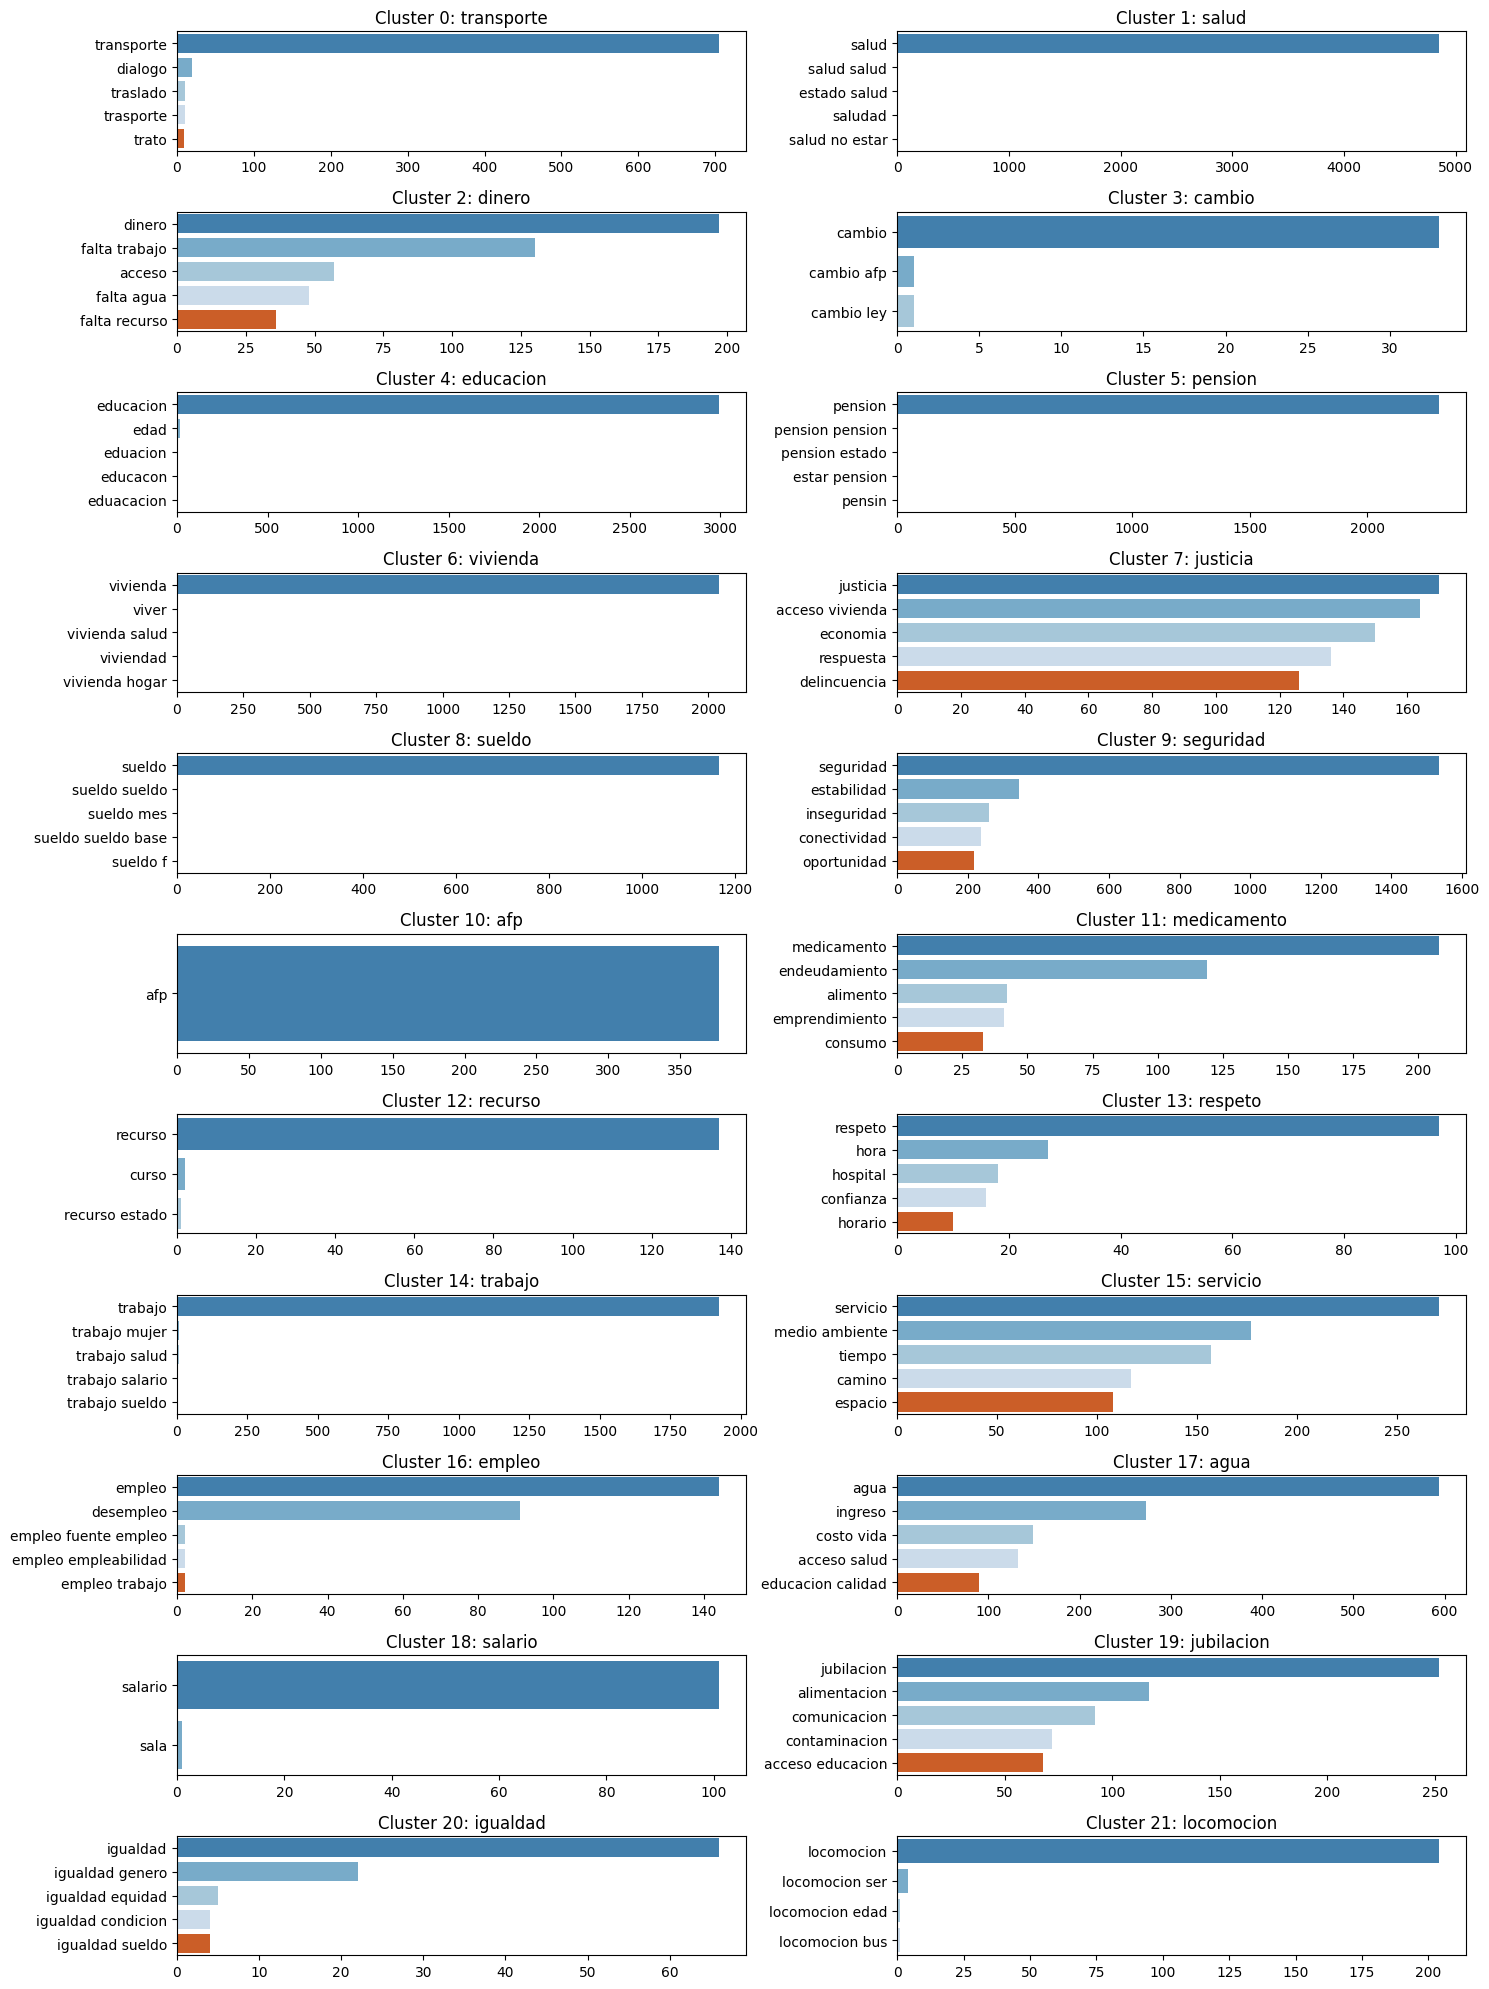

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns



# Define una paleta de colores secuenciales
sequential_color_palette = sns.color_palette("tab20c",n_colors=5)

def plot_top_values(cluster_data, cluster_label, color_palette):
    # Obtener los 5 principales valores y sus cuentas
    top_values = cluster_data['P3_A_lemmatized'].value_counts().head(5)
    
    # Si el cluster está vacío, no trazar el histograma y poner un aviso
    if top_values.empty:
        plt.text(0.5, 0.5, 'Cluster vacío', horizontalalignment='center', verticalalignment='center')
        return
    
    # Plotear el histograma con la paleta de colores secuenciales
    sns.barplot(y=top_values.index, x=top_values.values, orient='h', palette=color_palette)
    
    # Título basado en el valor más alto
    top_value_name = top_values.index[0]
    plt.title(f'Cluster {cluster_label}: {top_value_name}')


# Determinar el número de clusters para P3_A
n_clusters = csv_data['Cluster_Label_P3'].nunique()

# Configurar la grilla de plots
fig, axes = plt.subplots(11, 2, figsize=(15, 20))

# Asegúrate de tener la paleta de colores con la longitud adecuada para el número de clusters
color_palette = sns.color_palette("tab20c", n_colors=n_clusters)

for i in range(11):
    for j in range(2):
        n_clust = i*2 + j
        if n_clust < n_clusters:
            plt.subplot(11, 2, n_clust+1)
            cluster_data = csv_data[csv_data['Cluster_Label_P3'] == n_clust]
            plot_top_values(cluster_data, n_clust, color_palette)

plt.tight_layout()
plt.show()


In [10]:
def get_top_words(cluster_data, top_n=2):
    # Obtener los principales valores y sus cuentas
    top_values = cluster_data['P3_A_lemmatized'].value_counts().head(top_n)
    return top_values.index.tolist()

# Suponiendo que 'csv_data' es tu DataFrame y contiene una columna 'Cluster_Label_P3'
n_clusters = csv_data['Cluster_Label_P3'].nunique()

# Diccionario para almacenar las principales palabras de cada cluster
top_words_by_cluster = {}

for cluster_label in range(n_clusters):
    cluster_data = csv_data[csv_data['Cluster_Label_P3'] == cluster_label]
    
    # Obtener las dos palabras más comunes en el cluster
    top_words = get_top_words(cluster_data, 2)
    
    # Guardar las palabras en el diccionario
    top_words_by_cluster[cluster_label] = top_words

    
print('Necesidades Personales')
# Mostrar las dos palabras más comunes por cluster
for cluster_label, words in top_words_by_cluster.items():
    print(f"Cluster {cluster_label}: {', '.join(words)}")


Necesidades Personales
Cluster 0: transporte, dialogo
Cluster 1: salud, salud salud
Cluster 2: dinero, falta trabajo
Cluster 3: cambio, cambio afp
Cluster 4: educacion, edad
Cluster 5: pension, pension pension
Cluster 6: vivienda, viver
Cluster 7: justicia, acceso vivienda
Cluster 8: sueldo, sueldo sueldo
Cluster 9: seguridad, estabilidad
Cluster 10: afp
Cluster 11: medicamento, endeudamiento
Cluster 12: recurso, curso
Cluster 13: respeto, hora
Cluster 14: trabajo, trabajo mujer
Cluster 15: servicio, medio ambiente
Cluster 16: empleo, desempleo
Cluster 17: agua, ingreso
Cluster 18: salario, sala
Cluster 19: jubilacion, alimentacion
Cluster 20: igualdad, igualdad genero
Cluster 21: locomocion, locomocion ser


In [15]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from collections import Counter
# import pandas as pd

# # Función para contar las dos palabras más comunes en una lista de tokens
# def get_two_most_common_words(tokens):
#     most_common_words = Counter(tokens).most_common(2)
#     return most_common_words[0][0], most_common_words[1][0] if len(most_common_words) > 1 else (most_common_words[0][0], '')

# def plot_top_values(cluster_data, cluster_label, color_palette):
#     # Dividir las cadenas en listas de tokens y concatenar todas las listas en el cluster
#     all_tokens = sum(cluster_data['P3_A_lemmatized'].str.split().tolist(), [])
    
#     # Obtener las dos palabras más comunes
#     word1, word2 = get_two_most_common_words(all_tokens)
    
#     # Si el cluster está vacío, no trazar el histograma y poner un aviso
#     if not all_tokens:
#         plt.text(0.5, 0.5, 'Cluster vacío', horizontalalignment='center', verticalalignment='center')
#         return

#     # Contar la frecuencia de las 5 palabras más comunes
#     top_values = Counter(all_tokens).most_common(5)
#     words, counts = zip(*top_values)
    
#     # Plotear el histograma con la paleta de colores secuenciales
#     sns.barplot(y=list(words), x=list(counts), orient='h', palette=color_palette)
#     plt.title(f'Cluster {cluster_label}: {word1} y {word2}')

# # Cargar el dataset
# csv_data = pd.read_excel('dataset_transformado_vectors2.xlsx')

# # Determinar el número de clusters para P3_A
# n_clusters = csv_data['Cluster_Label_P3'].nunique()

# # Configurar la grilla de plots
# fig, axes = plt.subplots(15, 2, figsize=(15, 20))

# # Asegúrate de tener la paleta de colores con la longitud adecuada para el número de clusters
# color_palette = sns.color_palette("tab20c", n_colors=n_clusters)

# for i in range(15):
#     for j in range(2):
#         n_clust = i*2 + j
#         if n_clust < n_clusters:
#             plt.subplot(15, 2, n_clust+1)
#             cluster_data = csv_data[csv_data['Cluster_Label_P3'] == n_clust]
#             plot_top_values(cluster_data, n_clust, color_palette)

# plt.tight_layout()
# plt.show()


## Subplots Necesidades del pais

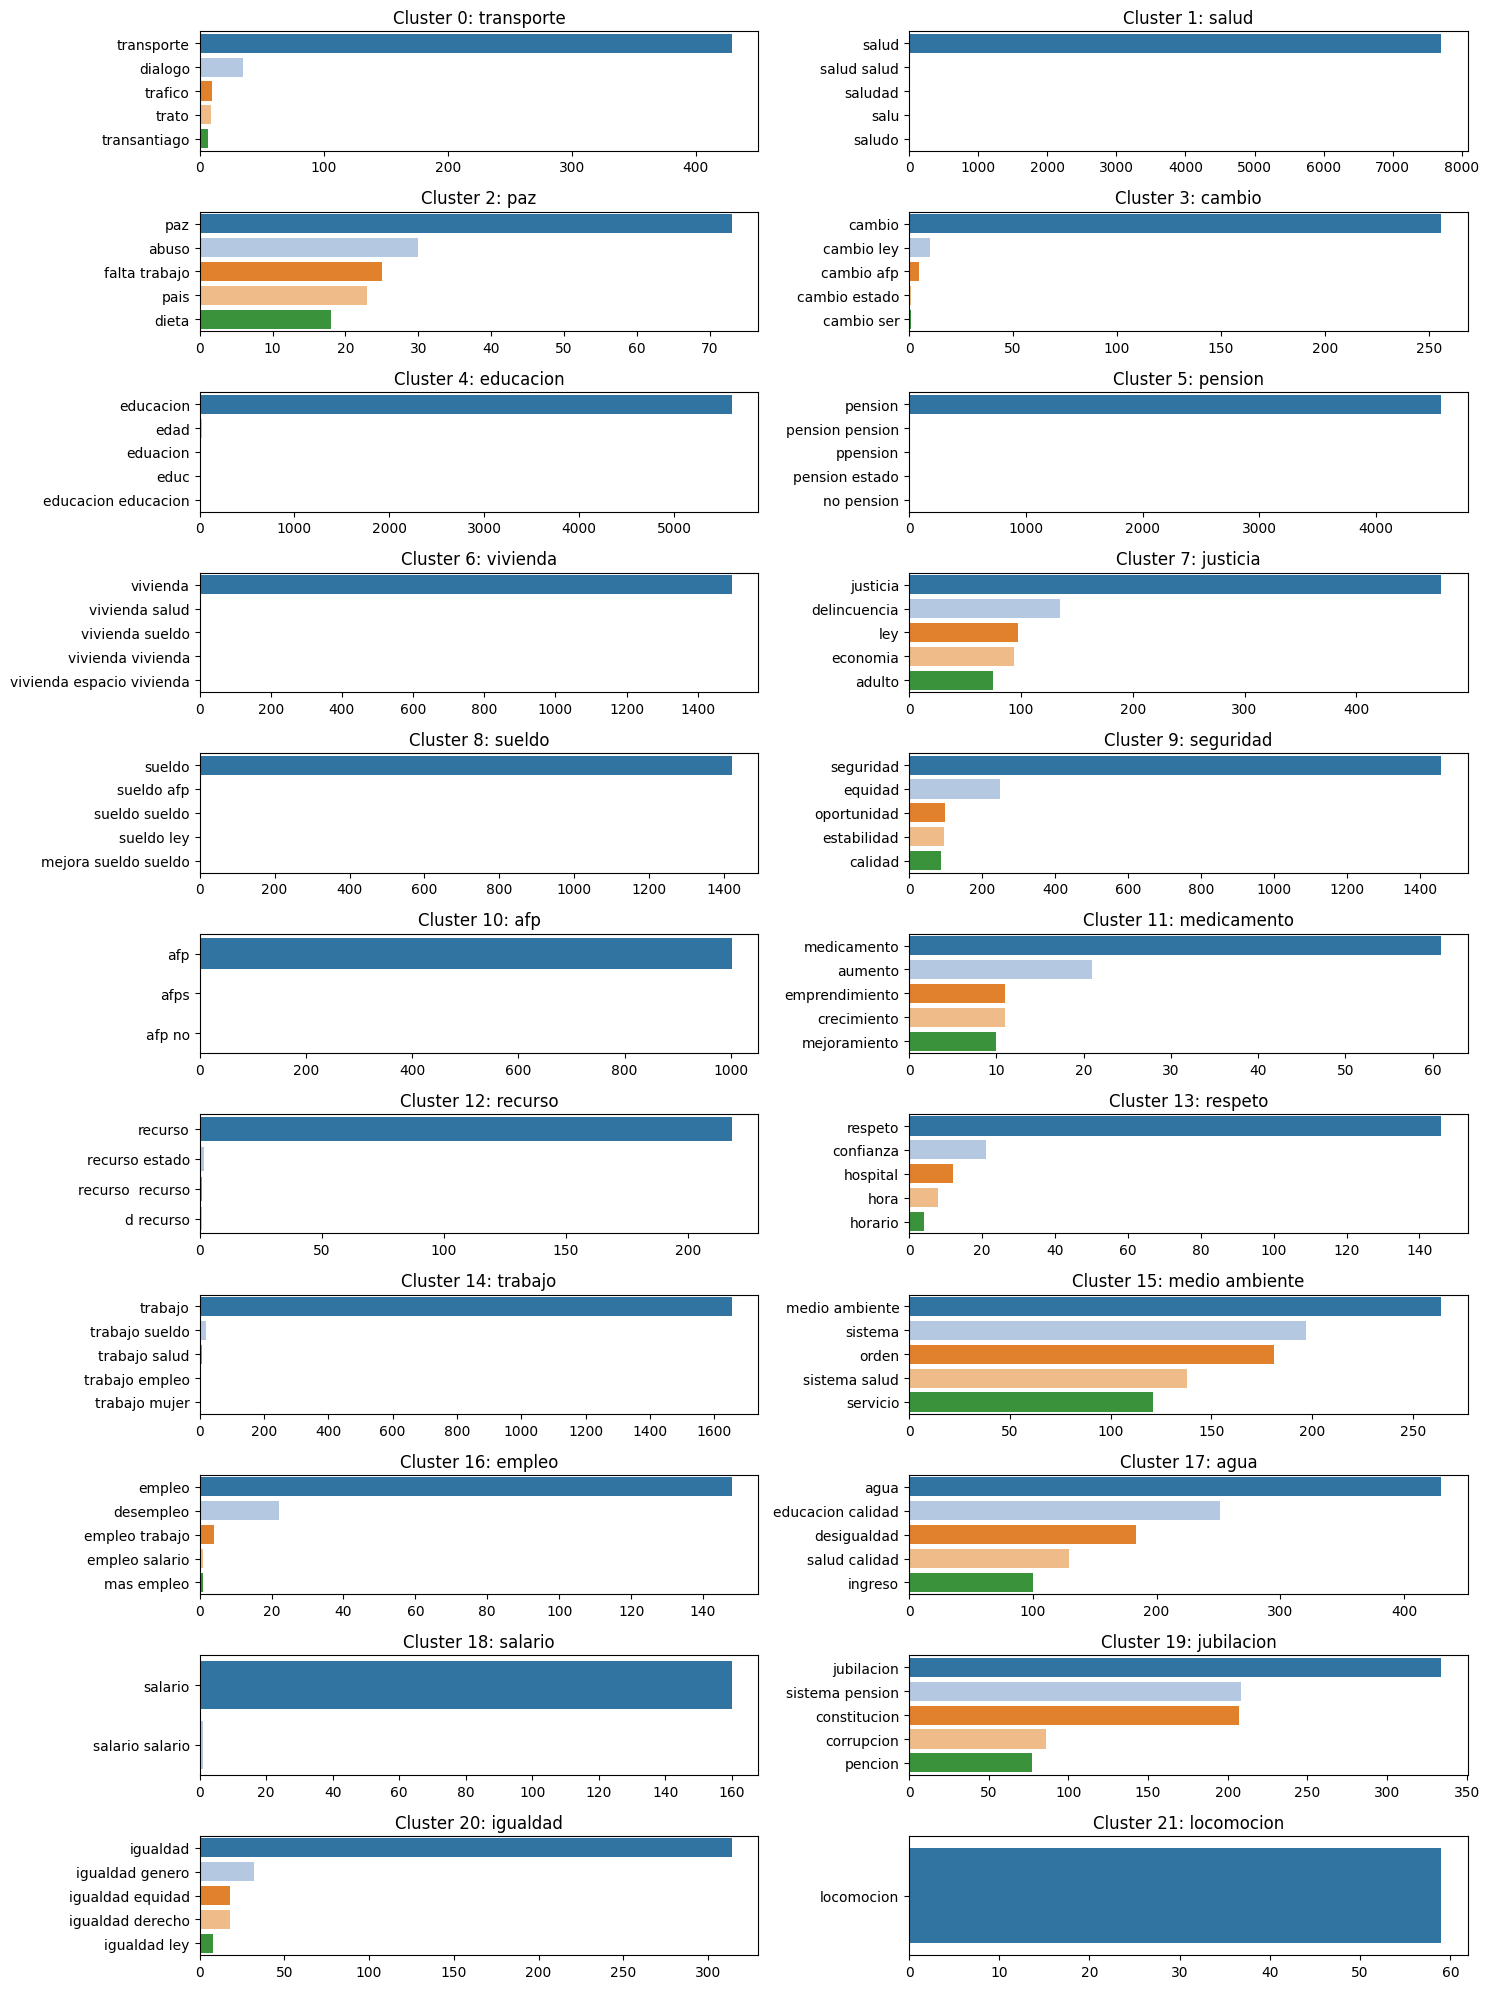

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns



# Define una paleta de colores secuenciales
sequential_color_palette = sns.color_palette("tab20c",n_colors=5)

def plot_top_values(cluster_data, cluster_label, color_palette):
    # Obtener los 5 principales valores y sus cuentas
    top_values = cluster_data['P2_A_lemmatized'].value_counts().head(5)
    
    # Si el cluster está vacío, no trazar el histograma y poner un aviso
    if top_values.empty:
        plt.text(0.5, 0.5, 'Cluster vacío', horizontalalignment='center', verticalalignment='center')
        return
    
    # Plotear el histograma con la paleta de colores secuenciales
    sns.barplot(y=top_values.index, x=top_values.values, orient='h', palette=color_palette)
    
    # Título basado en el valor más alto
    top_value_name = top_values.index[0]
    plt.title(f'Cluster {cluster_label}: {top_value_name}')


# Determinar el número de clusters para P3_A
n_clusters = csv_data['Cluster_Label_P2'].nunique()

# Configurar la grilla de plots
fig, axes = plt.subplots(11, 2, figsize=(15, 20))

# Asegúrate de tener la paleta de colores con la longitud adecuada para el número de clusters
color_palette = sns.color_palette("tab20", n_colors=n_clusters)

for i in range(11):
    for j in range(2):
        n_clust = i*2 + j
        if n_clust < n_clusters:
            plt.subplot(11, 2, n_clust+1)
            cluster_data = csv_data[csv_data['Cluster_Label_P2'] == n_clust]
            plot_top_values(cluster_data, n_clust, color_palette)

plt.tight_layout()
plt.show()


In [13]:
def get_top_words(cluster_data, top_n=2):
    # Obtener los principales valores y sus cuentas
    top_values = cluster_data['P2_A_lemmatized'].value_counts().head(top_n)
    return top_values.index.tolist()

# Suponiendo que 'csv_data' es tu DataFrame y contiene una columna 'Cluster_Label_P3'
n_clusters = csv_data['Cluster_Label_P2'].nunique()

# Diccionario para almacenar las principales palabras de cada cluster
top_words_by_cluster = {}

for cluster_label in range(n_clusters):
    cluster_data = csv_data[csv_data['Cluster_Label_P2'] == cluster_label]
    
    # Obtener las dos palabras más comunes en el cluster
    top_words = get_top_words(cluster_data, 2)
    
    # Guardar las palabras en el diccionario
    top_words_by_cluster[cluster_label] = top_words

    
print('Necesidades Pais')
# Mostrar las dos palabras más comunes por cluster
for cluster_label, words in top_words_by_cluster.items():
    print(f"Cluster {cluster_label}: {', '.join(words)}")

Necesidades Pais
Cluster 0: transporte, dialogo
Cluster 1: salud, salud salud
Cluster 2: paz, abuso
Cluster 3: cambio, cambio ley
Cluster 4: educacion, edad
Cluster 5: pension, pension pension
Cluster 6: vivienda, vivienda salud
Cluster 7: justicia, delincuencia
Cluster 8: sueldo, sueldo afp
Cluster 9: seguridad, equidad
Cluster 10: afp, afps
Cluster 11: medicamento, aumento
Cluster 12: recurso, recurso estado
Cluster 13: respeto, confianza
Cluster 14: trabajo, trabajo sueldo
Cluster 15: medio ambiente, sistema
Cluster 16: empleo, desempleo
Cluster 17: agua, educacion calidad
Cluster 18: salario, salario salario
Cluster 19: jubilacion, sistema pension
Cluster 20: igualdad, igualdad genero
Cluster 21: locomocion


## Heatmap necesidades personales vs pais

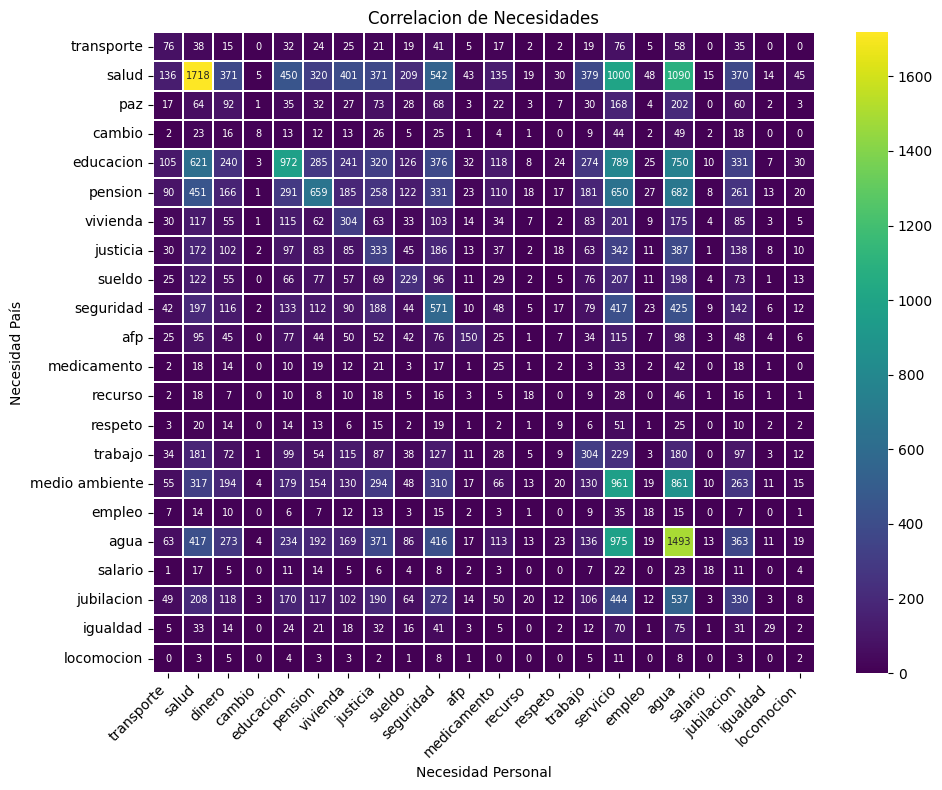

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asegúrate de que csv_data es tu DataFrame con las columnas 'Cluster_Label_P2' y 'Cluster_Label_P3'

# Función para encontrar el top value de un cluster
def find_top_value(cluster_data, column_name):
    top_values = cluster_data[column_name].value_counts().head(1)
    return top_values.index[0] if not top_values.empty else None

# Crea listas para los top values de P2 y P3
top_values_p2 = [find_top_value(csv_data[csv_data['Cluster_Label_P2'] == cluster], 'P2_A_lemmatized') for cluster in range(22)]
top_values_p3 = [find_top_value(csv_data[csv_data['Cluster_Label_P3'] == cluster], 'P3_A_lemmatized') for cluster in range(22)]

# Crea una tabla de contingencia
contingency_table = pd.DataFrame(index=top_values_p2, columns=top_values_p3).fillna(0)

# Rellena la tabla de contingencia
for i in range(22):
    for j in range(22):
        subset = csv_data[(csv_data['Cluster_Label_P2'] == i) & (csv_data['Cluster_Label_P3'] == j)]
        if not subset.empty:
            contingency_table.iloc[i, j] = len(subset)

# Mostrar el heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(contingency_table, annot=True, annot_kws={'size': 7}, fmt='g', linewidths=0.2, 
                 linecolor="white", cmap='viridis')
plt.title('Correlacion de Necesidades')
plt.xlabel('Necesidad Personal')
plt.ylabel('Necesidad País')

# Inclinar las etiquetas del eje x
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()



In [68]:
sum_ocurrencias_p2 = contingency_table.sum(axis=1)  # Suma de ocurrencias por cada fila (P2)
sum_ocurrencias_p3 = contingency_table.sum(axis=0)  # Suma de ocurrencias por cada columna (P3)

# Inicializa la lista para almacenar los resultados
cluster_results = []

# Itera sobre cada cluster y calcula las métricas
for cluster in range(22):
    # Coocurrencias para el cluster en P2 y P3
    coocurrencias_p2 = contingency_table.iloc[cluster, :].sum()
    coocurrencias_p3 = contingency_table.iloc[:, cluster].sum()
    
    # Total de ocurrencias para el cluster en P2 y P3
    total_ocurrencias_p2 = sum_ocurrencias_p2[cluster]
    total_ocurrencias_p3 = sum_ocurrencias_p3[cluster]
    
    # Total de ocurrencias para el cluster (suma de ocurrencias en P2 y P3 menos la coocurrencia porque se cuenta dos veces)
    total_ocurrencias = total_ocurrencias_p2 + total_ocurrencias_p3 - contingency_table.iloc[cluster, cluster]
    
    # Calcula el porcentaje de coocurrencias sobre el total
    porcentaje_coocurrencias = (contingency_table.iloc[cluster, cluster] / total_ocurrencias) * 100 if total_ocurrencias != 0 else 0
    
    # Agrega los resultados a la lista
    cluster_results.append({
        'Cluster': cluster,
        'Coocurrencias': contingency_table.iloc[cluster, cluster],
        'Total Ocurrencias': total_ocurrencias,
        'Porcentaje': f"{porcentaje_coocurrencias:.1f}%"
    })

# Crea un DataFrame con los resultados
resultados_df = pd.DataFrame(cluster_results)

# Calcula los totales para cada columna
total_coocurrencias = resultados_df['Coocurrencias'].sum()
total_ocurrencias = resultados_df['Total Ocurrencias'].sum()
total_porcentaje = f"{(total_coocurrencias / total_ocurrencias * 100) if total_ocurrencias else 0:.1f}%"

# Agrega la fila de totales al DataFrame usando .loc
resultados_df.loc['Total'] = ['Total', total_coocurrencias, total_ocurrencias, total_porcentaje]

resultados_df.reset_index()
# Muestra el DataFrame
print(resultados_df)

      Cluster  Coocurrencias  Total Ocurrencias Porcentaje
0           0             76               1233       6.2%
1           1           1718              10857      15.8%
2           2             92               2848       3.2%
3           3              8                300       2.7%
4           4            972               7757      12.5%
5           5            659               6217      10.6%
6           6            304               3261       9.3%
7           7            333               4655       7.2%
8           8            229               2369       9.7%
9           9            571               5781       9.9%
10         10            150               1231      12.2%
11         11             25               1098       2.3%
12         12             18                344       5.2%
13         13              9                413       2.2%
14         14            304               3339       9.1%
15         15            961               9978       9.

# Analisis Exploratorio

In [12]:
import pandas as pd
df = pd.read_excel("dataset_transformado_vectors2.xlsx")
df.head()

,ID,ID Archivo,Fecha,Hora Inicio,Hora Termino,Lugar,Dirección,Comuna,Region,Participantes,...,SEXO,EDUCACION,P2_A_lemmatized,P3_A_lemmatized,P2_A_lemmatized_tokens,P3_A_lemmatized_tokens,P2_A_lemmatized_tokens_fasttext,P3_A_lemmatized_tokens_fasttext,Cluster_Label_P2,Cluster_Label_P3
0,1,ENC_U_4602780640112847056,2020-02-25 00:00:00,10:00:00,12:00:00,Municipalidad de Saavedra,Ejercito 1424,Saavedra,de la Araucania,5,...,F,Básica_Incompleta,salud,cobro luz agua,['salud'],"['cobro', 'luz', 'agua']",[ 0.00836584 0.01252173 0.03286288 -0.002504...,[ 4.51798597e-03 -2.49283825e-04 1.59911551e-...,1,17
1,1,ENC_U_4602780640112847056,2020-02-25 00:00:00,10:00:00,12:00:00,Municipalidad de Saavedra,Ejercito 1424,Saavedra,de la Araucania,5,...,F,Básica_Completa,afp,trabajo,['afp'],['trabajo'],[ 1.22947069e-02 1.43508138e-02 6.93716016e-...,[ 7.45354500e-03 -5.00669517e-03 2.23103445e-...,10,14
2,1,ENC_U_4602780640112847056,2020-02-25 00:00:00,10:00:00,12:00:00,Municipalidad de Saavedra,Ejercito 1424,Saavedra,de la Araucania,5,...,F,Básica_Completa,educacion,locomocion,['educacion'],['locomocion'],[ 7.48222601e-03 -7.51386862e-03 2.07096003e-...,[ 9.38946940e-03 1.33755505e-02 -4.43797857e-...,4,21
3,2,ENC_U_4602778880117363308,2020-02-18 00:00:00,11:00:00,13:00:00,Sede Comunidad Indígena Millapán Romero,Sector Coipulafquen,Padre Las Casas,de la Araucania,5,...,F,Básica_Completa,salud,agua,['salud'],['agua'],[ 0.00836584 0.01252173 0.03286288 -0.002504...,[ 1.06217787e-02 -1.17960349e-02 1.10789416e-...,1,17
4,2,ENC_U_4602778880117363308,2020-02-18 00:00:00,11:00:00,13:00:00,Sede Comunidad Indígena Millapán Romero,Sector Coipulafquen,Padre Las Casas,de la Araucania,5,...,F,Básica_Incompleta,trabajo,trabajo,['trabajo'],['trabajo'],[ 7.45354500e-03 -5.00669517e-03 2.23103445e-...,[ 7.45354500e-03 -5.00669517e-03 2.23103445e-...,14,14


In [13]:
import pandas as pd

# Suponiendo que df es tu DataFrame
# Agrupas por cada columna y cuentas las ocurrencias
grouped_p2 = df.groupby('Cluster_Label_P2').size().reset_index(name='Pais')
grouped_p3 = df.groupby('Cluster_Label_P3').size().reset_index(name='Personal')

# Luego unes los dos DataFrames basados en los valores de los clusters
# Asumiendo que los nombres de los clusters en ambas columnas son los mismos
result = pd.merge(grouped_p2, grouped_p3, left_on='Cluster_Label_P2', right_on='Cluster_Label_P3', how='outer')

# Renombras las columnas para claridad
result = result.rename(columns={'Cluster_Label_P2': 'Cluster'})

# Eliminas la columna duplicada de cluster
result = result.drop('Cluster_Label_P3', axis=1)

# Si quieres, puedes establecer 'Cluster' como índice
result = result.set_index('Cluster').reset_index()
result = result.drop('Cluster', axis=1)
result

,Pais,Personal
0,510,799
1,7711,4864
2,941,1999
3,273,35
4,5687,3042
5,4564,2312
6,1505,2060
7,2165,2823
8,1426,1172
9,2688,3664


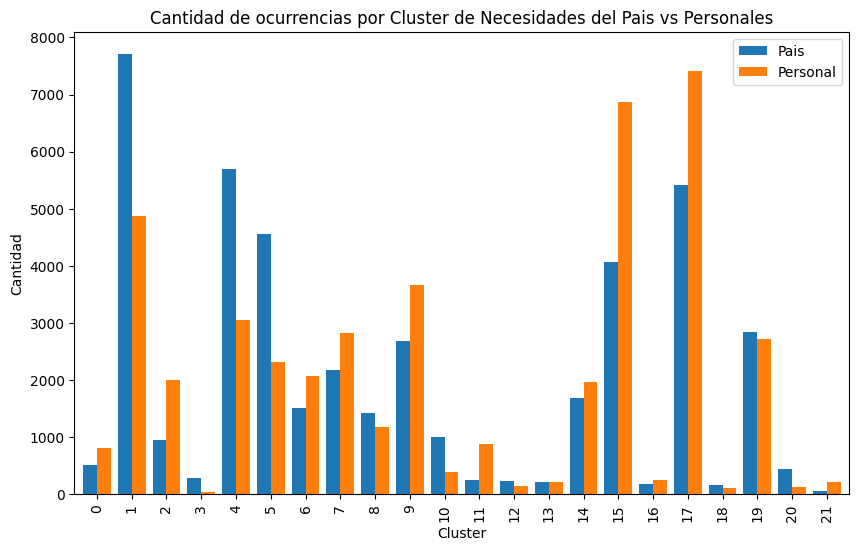

In [14]:
import matplotlib.pyplot as plt
# Configuración del gráfico
result.plot(kind='bar', figsize=(10, 6), width = 0.8)

# Añadir etiquetas y título
plt.xlabel('Cluster')
plt.ylabel('Cantidad')
plt.title('Cantidad de ocurrencias por Cluster de Necesidades del Pais vs Personales')



# Mostrar el gráfico
plt.show()


In [15]:
df9 = df[df["Cluster_Label_P3"]==9]
df9['P3_A_lemmatized_tokens'].value_counts().head(20)

['seguridad']             1536
['estabilidad']            345
['inseguridad']            259
['conectividad']           238
['oportunidad']            217
['necesidad']              171
['tranquilidad']            92
['inestabilidad']           78
['equidad']                 49
['falta', 'seguridad']      48
['discapacidad']            46
['electricidad']            41
['calidad']                 37
['accesibilidad']           24
['actividad']               20
['dignidad']                18
['autoridad']               15
['seguridad', 'orden']      14
['habitabilidad']           13
['orden', 'seguridad']      12
Name: P3_A_lemmatized_tokens, dtype: int64

In [16]:
df1 = df[(df["Cluster_Label_P3"] == 9)]
selected_columns = df1[['P3_A_lemmatized', 'P3_B']].head(50)
selected_columns.rename(columns={'P3_A': 'Necesidades Personales', 'P3_A': 'Necesidades País'}, inplace=True)
print(selected_columns)

       P3_A_lemmatized                                               P3_B
9         tranquilidad  la situación actual ha generado alteración en ...
14           seguridad                                                NaN
41         oportunidad              no tenemos oportunidades para surgir.
49         oportunidad  las oportunidades laborales son ya pocas y mas...
50           seguridad  hoy todo nos asusta, no hay respeto por las in...
57      seguridad casa  tenemos miedo que nos roben. incluso los mismo...
83           seguridad                                                NaN
107        oportunidad  -clasismo\n-raza\n-pituto mata curriculum\n-si...
111          seguridad  las calles son inseguras,falta luminaria y por...
114          seguridad                en las calles, falta de luminancia.
122          seguridad                                 mucha delincuencia
125          seguridad                                 mejorar luminarias
145          seguridad          acoso 

In [69]:
import pandas as pd

# Suponiendo que df es tu DataFrame
# Agrupas por 'Región' y 'Cluster_Label_P2_ft', y cuentas las ocurrencias
grouped_p2 = df.groupby(['Region', 'Cluster_Label_P2', 'P2_A_lemmatized']).size().reset_index(name='Count_P2')

# Agrupas por 'Región' y 'Cluster_Label_P3_ft', y cuentas las ocurrencias
grouped_p3 = df.groupby(['Region', 'Cluster_Label_P3', 'P3_A_lemmatized']).size().reset_index(name='Count_P3')

# Luego unes los dos DataFrames basados en la columna 'Región'
result = pd.merge(grouped_p2, grouped_p3, on='Region', how='outer')

# Ordenas el DataFrame por 'Region' y 'Count_P2'
grouped_p2_sorted = grouped_p2.sort_values(['Region', 'Count_P2'], ascending=[True, False])
grouped_p3_sorted = grouped_p3.sort_values(['Region', 'Count_P3'], ascending=[True, False])

# Seleccionas los tres clusters con mayor cantidad por región
top_3_clusters_per_region = grouped_p2_sorted.groupby('Region').head(3)
top_3_clusters_per_region2 = grouped_p3_sorted.groupby('Region').head(3)


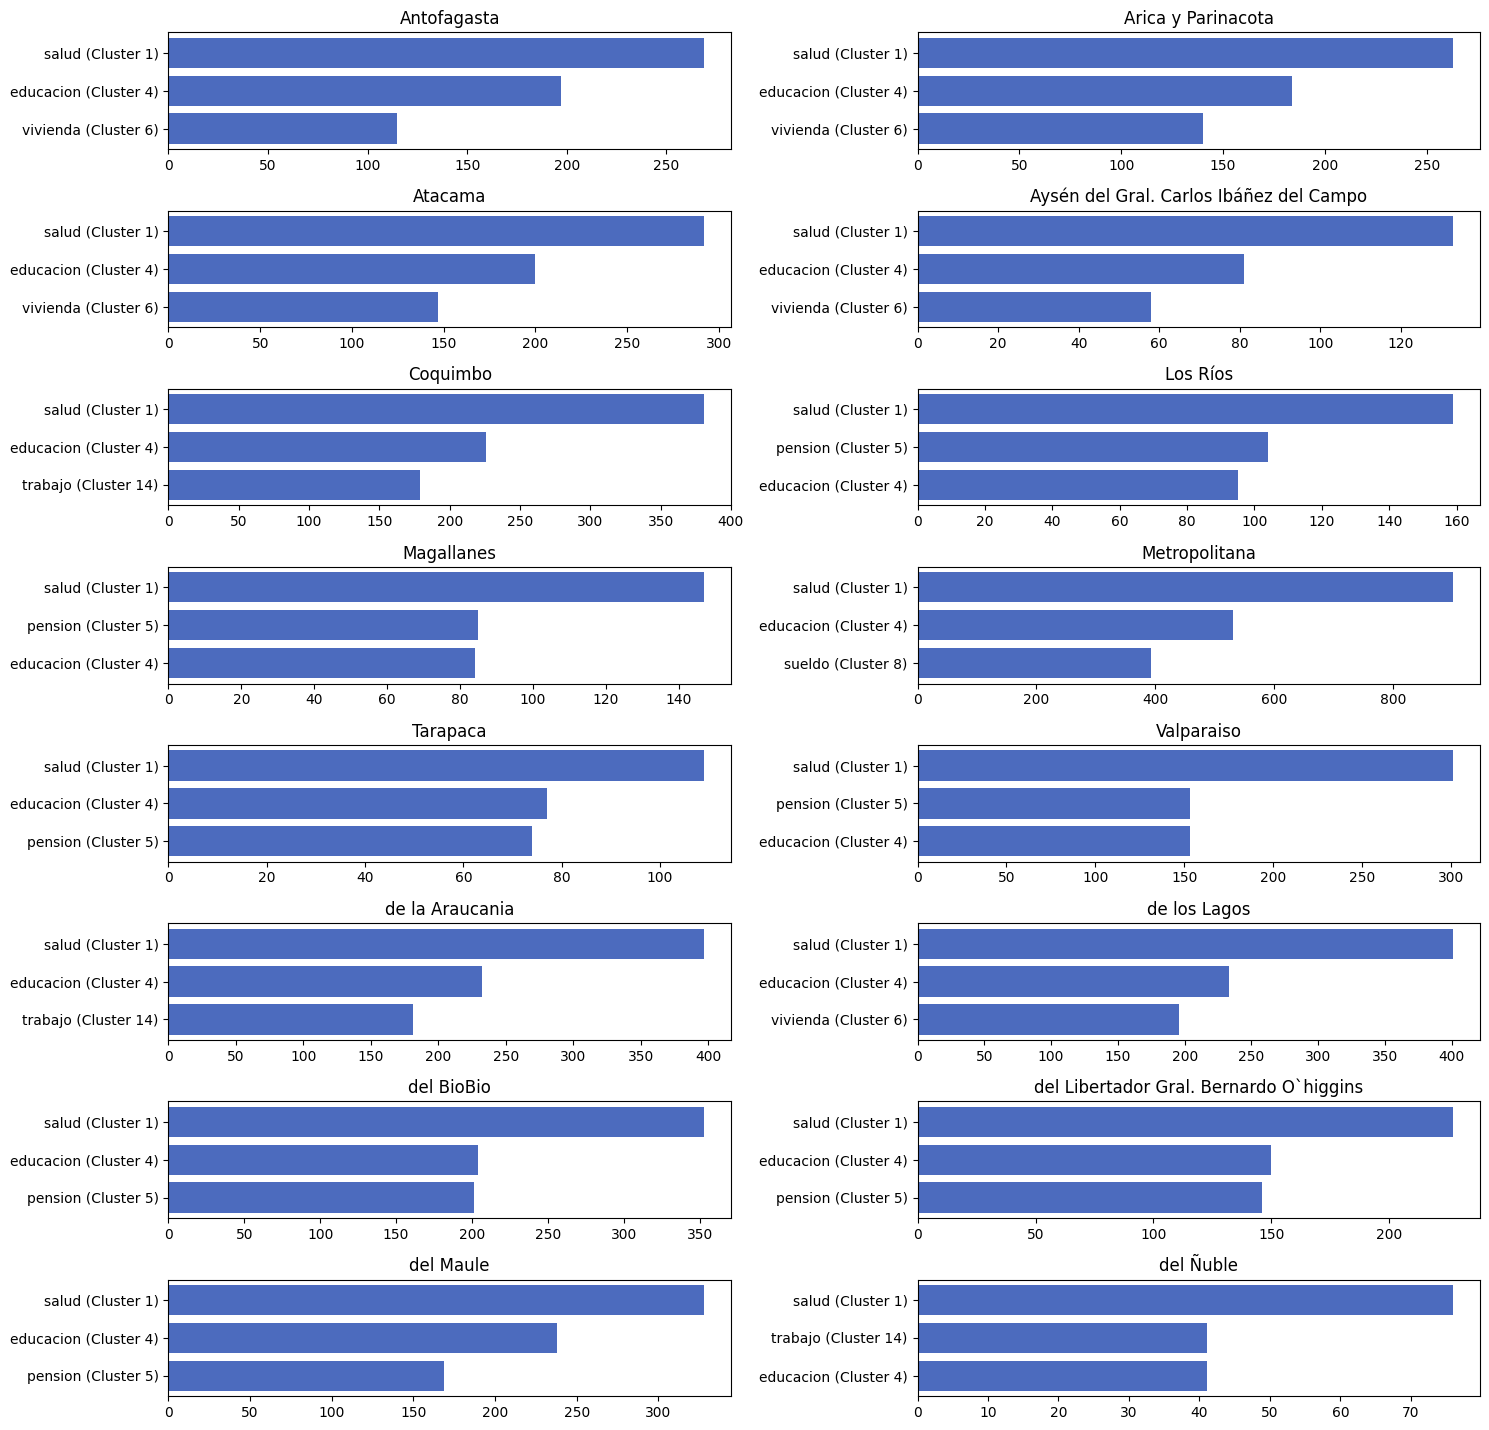

In [70]:
import matplotlib.pyplot as plt
import pandas as pd

# Suponiendo que top_3_clusters_per_region es tu DataFrame
# top_3_clusters_per_region = ...

unique_regions = top_3_clusters_per_region2['Region'].unique()

# Calcula el número de filas necesarias para los subplots
n_rows = len(unique_regions) // 2 + len(unique_regions) % 2

# Configura el lienzo de los subplots
fig, axes = plt.subplots(n_rows, 2, figsize=(15, 1.8 * n_rows))

# Asegúrate de que axes sea un array 2D
if n_rows == 1:
    axes = [axes]

# Define el color naranja pastel
pastel_orange = '#4C6BBE'

# Rellena cada subplot con los datos de cada región
for i, region in enumerate(unique_regions):
    ax = axes[i // 2, i % 2]
    data = top_3_clusters_per_region2[top_3_clusters_per_region2['Region'] == region]

    # Ordena los datos de mayor a menor según 'Count_P2'
    data_sorted = data.sort_values('Count_P3', ascending=True)

    # Combina 'P2_A_lemmatized_tokens' y 'Cluster_Label_P2_ft' para las etiquetas del eje Y
    y_labels = data_sorted['P3_A_lemmatized'].astype(str) + ' (Cluster ' + data_sorted['Cluster_Label_P3'].astype(str) + ')'

    # Gráficos de barras horizontales con el color definido
    ax.barh(y_labels, data_sorted['Count_P3'], color=pastel_orange)
    ax.set_title(region)

# Ajusta los subplots y muestra el gráfico
plt.tight_layout()
plt.show()



In [74]:
# Suponiendo que top_3_clusters_per_region2 es tu DataFrame y ya está cargado

# Inicializa un diccionario para almacenar las descripciones por región
descriptions_by_region = {}

# Agrupa el DataFrame por región y itera sobre cada grupo
for region, group in top_3_clusters_per_region.groupby('Region'):
    # Extrae todos los temas lematizados para la región actual y los une con comas
    temas = ', '.join(group['P2_A_lemmatized'].tolist())
    # Almacena la cadena de temas para la región actual
    descriptions_by_region[region] = temas

# Ahora puedes imprimir las descripciones por región
for region, temas in descriptions_by_region.items():
    print(f"Región: {region} - Temas: {temas}\n")


Región: Antofagasta - Temas: salud, educacion, pension

Región: Arica y Parinacota - Temas: salud, educacion, pension

Región: Atacama - Temas: salud, educacion, pension

Región: Aysén del Gral. Carlos Ibáñez del Campo - Temas: salud, educacion, pension

Región: Coquimbo - Temas: salud, educacion, pension

Región: Los Ríos - Temas: salud, educacion, pension

Región: Magallanes - Temas: salud, educacion, pension

Región: Metropolitana - Temas: salud, educacion, pension

Región: Tarapaca - Temas: salud, educacion, pension

Región: Valparaiso - Temas: salud, educacion, pension

Región: de la Araucania - Temas: salud, educacion, pension

Región: de los Lagos - Temas: salud, educacion, pension

Región: del BioBio - Temas: salud, educacion, pension

Región: del Libertador Gral. Bernardo O`higgins - Temas: salud, educacion, pension

Región: del Maule - Temas: salud, educacion, pension

Región: del Ñuble - Temas: salud, educacion, pension



In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Suponiendo que top_3_clusters_per_region es tu DataFrame
# top_3_clusters_per_region = ...

unique_regions = top_3_clusters_per_region2['Region'].unique()

# Calcula el número de filas necesarias para los subplots
n_rows = len(unique_regions) // 2 + len(unique_regions) % 2

# Configura el lienzo de los subplots
fig, axes = plt.subplots(n_rows, 2, figsize=(15, 1.8 * n_rows))

# Asegúrate de que axes sea un array 2D
if n_rows == 1:
    axes = [axes]

# Rellena cada subplot con los datos de cada región
for i, region in enumerate(unique_regions):
    ax = axes[i // 2, i % 2]
    data = top_3_clusters_per_region2[top_3_clusters_per_region2['Region'] == region]

    # Ordena los datos de mayor a menor según 'Count_P2'
    data_sorted = data.sort_values('Count_P3', ascending=True)

    # Combina 'P2_A_lemmatized_tokens' y 'Cluster_Label_P2_ft' para las etiquetas del eje Y
    y_labels = data_sorted['P3_A_lemmatized_tokens'].astype(str) + ' (Cluster ' + data_sorted['Cluster_Label_P3_ft'].astype(str) + ')'

    # Gráficos de barras horizontales
    ax.barh(y_labels, data_sorted['Count_P3'])
    ax.set_title(region)

# Ajusta los subplots y muestra el gráfico
plt.tight_layout()
plt.show()

NameError: name 'top_3_clusters_per_region2' is not defined

In [ ]:
# region_mapping = {
#     'de la Araucania': 'Región de La Araucanía',
#     'Atacama': 'Región de Atacama',
#     'Los Ríos': 'Región de Los Ríos',
#     'del Maule': 'Región del Maule',
#     'Tarapaca': 'Región de Tarapacá',
#     'de los Lagos': 'Región de Los Lagos',
#     'Coquimbo': 'Región de Coquimbo',
#     'Valparaiso': 'Región de Valparaíso',
#     'del BioBio': 'Región del Bío-Bío',
#     'Antofagasta': 'Región de Antofagasta',
#     'Arica y Parinacota': 'Región de Arica y Parinacota',
#     'Metropolitana': 'Región Metropolitana de Santiago',
#     'del Ñuble': 'Región de Ñuble',
#     'Magallanes': 'Región de Magallanes y Antártica Chilena',
#     'Aysén del Gral. Carlos Ibáñez del Campo': 'Región de Aysén del Gral.Ibañez del Campo',
#     'del Libertador Gral. Bernardo O`higgins': "Región del Libertador Bernardo O'Higgins"
    
# }

# df['Region'] = df['Region'].map(region_mapping)


# import geopandas as gpd
# import matplotlib.pyplot as plt

# # Carga del shapefile de las regiones de Chile
# gdf = gpd.read_file(r'C:\Users\GH\Desktop\Capstone Project\data_origen\Dialogos\Regiones\Regional.shp')


# gdf_merged = gdf.merge(df, left_on='Region', right_on='Region')


# # Crea el mapa
# fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# # Colorea las regiones basadas en el cluster al que pertenecen
# gdf_merged.plot(column='Cluster_Label_P2_ft', ax=ax, legend=True, legend_kwds={'label': "Clusters por Región"})

# # Añade títulos y etiquetas según sea necesario
# plt.title('Mapa de Clusters de Chile')
# plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
# Calcular el Índice de Silueta
silhouette_avg = silhouette_score(combined_vectors, kmeans.labels_)
print("Índice de Silueta: ", silhouette_avg)

In [ ]:
from sklearn.metrics import davies_bouldin_score

# Suponiendo que 'combined_data' son tus datos y 'kmeans.labels_' son las etiquetas de clúster de tu modelo KMeans
db_index = davies_bouldin_score(combined_data, kmeans.labels_)
print("Índice de Davies-Bouldin:", db_index)


In [ ]:
# %%time
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score
# import pandas as pd
# import numpy as np

# # Función para convertir la cadena a un array
# def string_to_array_v2(s):
#     try:
#         arr = np.fromstring(s[1:-1], sep=',')
#         if arr.size == 0:
#             return np.zeros(300)
#         return arr
#     except:
#         return np.zeros(300)

# # Cargar el archivo
# data_transformed = pd.read_excel('dataset_transformado_con_clusters_spacy.xlsx'.xlsx')

# # Convertir las columnas de cadena a arrays de numpy
# data_transformed["P2_A_lemmatized_tokens_fasttext"] = data_transformed["P2_A_lemmatized_tokens_fasttext"].apply(string_to_array_v2)
# data_transformed["P3_A_lemmatized_tokens_fasttext"] = data_transformed["P3_A_lemmatized_tokens_fasttext"].apply(string_to_array_v2)

# # Concatenar los arrays de P2 y P3
# combined_data = np.vstack([
#     np.stack(data_transformed["P2_A_lemmatized_tokens_fasttext"].values),
#     np.stack(data_transformed["P3_A_lemmatized_tokens_fasttext"].values)
# ])

# # Definir un rango de valores K para probar
# range_n_clusters = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] 

# # Calcular el Índice de Silueta para cada valor de K
# for n_clusters in range_n_clusters:
#     kmeans = KMeans(n_clusters=n_clusters, random_state=42)
#     cluster_labels = kmeans.fit_predict(combined_data)
#     silhouette_avg = silhouette_score(combined_data, cluster_labels)
#     print("Para n_clusters =", n_clusters,
#           "el promedio del índice de silueta es:", silhouette_avg)

In [ ]:
import matplotlib.pyplot as plt

    # Definir un rango de valores K para probar
range_n_clusters = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] 

# Calcular el Índice de Silueta para cada valor de K
silhouette_scores = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(combined_vectors)
    silhouette_avg = silhouette_score(combined_vectors, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print("Para n_clusters =", n_clusters, "el promedio del índice de silueta es:", silhouette_avg)
    


# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [ ]:
!python -m spacy download es_core_news_lg

In [ ]:
%%time
import spacy
import pandas as pd
from tqdm.notebook import tqdm

# Cargar el modelo de lenguaje de spaCy para español
nlp = spacy.load('es_core_news_md')

def extract_pos(text):
    """Función para extraer las etiquetas POS del texto."""
    if not isinstance(text, str) or not text:
        return ''
    doc = nlp(text)
    pos_tags = ' '.join([token.pos_ for token in doc])
    return pos_tags

# Leer el dataset transformado
csv_data = pd.read_excel('dataset_transformado.xlsx')
csv_data = csv_data.dropna(subset=['P2_A', 'P3_A'])

# Nombres de las columnas a procesar
columns_to_process = ['P2_A', 'P3_A']

# Extraer POS tags de cada columna
for col in tqdm(columns_to_process, desc="Extrayendo POS tags"):
    pos_col_name = f'{col}_POS'
    csv_data[pos_col_name] = csv_data[col].astype(str).apply(extract_pos)

# Guardar el dataset con POS tags
csv_data.to_excel('dataset_transformado.xlsx', index=False)
